<a href="https://colab.research.google.com/github/shobhit-saini/Neural_Network/blob/master/Cat_Vs_Non_Cat/logistic%20regression%20classifier/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = 0, it's a 'non-cat' picture.
y = 1, it's a 'cat' picture.


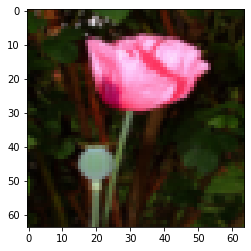

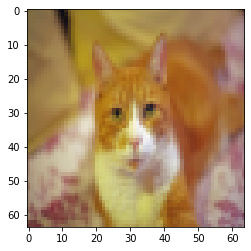

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import random
%matplotlib inline


'''
Dimension:
train_set_x_orig:209,64,64
train_set_y_orig:1,209
test_set_x_orig:50,64,64
test_set_y_orig:1,50
flattend_train_x:12288, 209
flattend_test_x:12288, 50
weight:(12288, 1)
A:(1,209)
dw:(12288, 1)
'''
#Loding the data from h5 format file
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data()

#Analyze the data

plt.imshow(train_set_x_orig[30])
print ("y = " + str(train_set_y[0][30]) + ", it's a '" + classes[train_set_y[0][30]].decode("utf-8") +  "' picture.")
plt.figure()
plt.imshow(train_set_x_orig[24])
print ("y = " + str(train_set_y[0][24]) + ", it's a '" + classes[train_set_y[0][24]].decode("utf-8") +  "' picture.")

#Reshape the training and test data sets images of size (x,y,3) are flattend into single vector
'''flattend_train_set_x = []
for i in range(train_set_x_orig[0]):
  flattend_train_set_x.append( np.reshape(i, (1, train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*3)))
flattend_train_set_x = np.array(flattend_train_set_x)'''
flattend_train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
flattend_test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Normalize the dataset
flattend_train_set_x = (flattend_train_set_x)/255
flattend_test_set_x = flattend_test_set_x/255

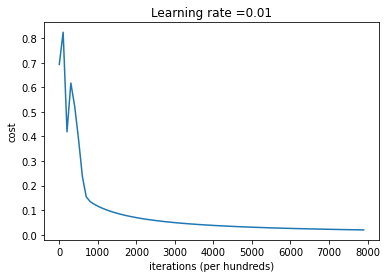

Accuracy: 72.0


In [124]:
Number_of_features = flattend_train_set_x.shape[0]
weight = np.zeros(( Number_of_features, 1 ) ) # (12288, 1)
bias = 0
learning_rate = 0.01
#Sigmoid function defination
def sigmoid(x):
  return 1/(1+np.exp(-x))

cost = []
iteration = []
for i in range(8000):
  A = sigmoid(np.dot(weight.T, flattend_train_set_x) + bias) #(1, 12288)*(12288,209) = (1,209)
  if i%100 == 0:
    cost.append(np.sum(-(train_set_y*np.log(A) + (1-train_set_y)*np.log(1-A)))/209)
    iteration.append(i)
  dw = np.dot(flattend_train_set_x, (A-train_set_y).T)/209 #(12288,209)*(209,1) = (12288, 1)
  db = np.sum(A-train_set_y)/209
  weight -= learning_rate*dw
  bias -= learning_rate*db

plt.plot(iteration, cost)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
  
def test():
  A = sigmoid(np.dot(weight.T, flattend_test_set_x) + bias)
  predict_y = np.zeros((1,50))
  for i in range(50):
    if A[0][i] > 0.5:
      predict_y[0][i] = 1
    else:
      predict_y[0][i] = 0
  accuracy = (100 - np.mean(abs(predict_y - test_set_y))*100)
  print( "Accuracy:", accuracy )
test()
